In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from pickle import dump
warnings.filterwarnings("ignore")

In [ ]:
#Read the csv file
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#This dataset contains 1338 data points with 6 independent 
# features and 1 target feature(charges).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#From the above, we can see that the dataset contains 2 
# columns with float values 3 with 
# categorical values and the rest contains integer values.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#To check null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

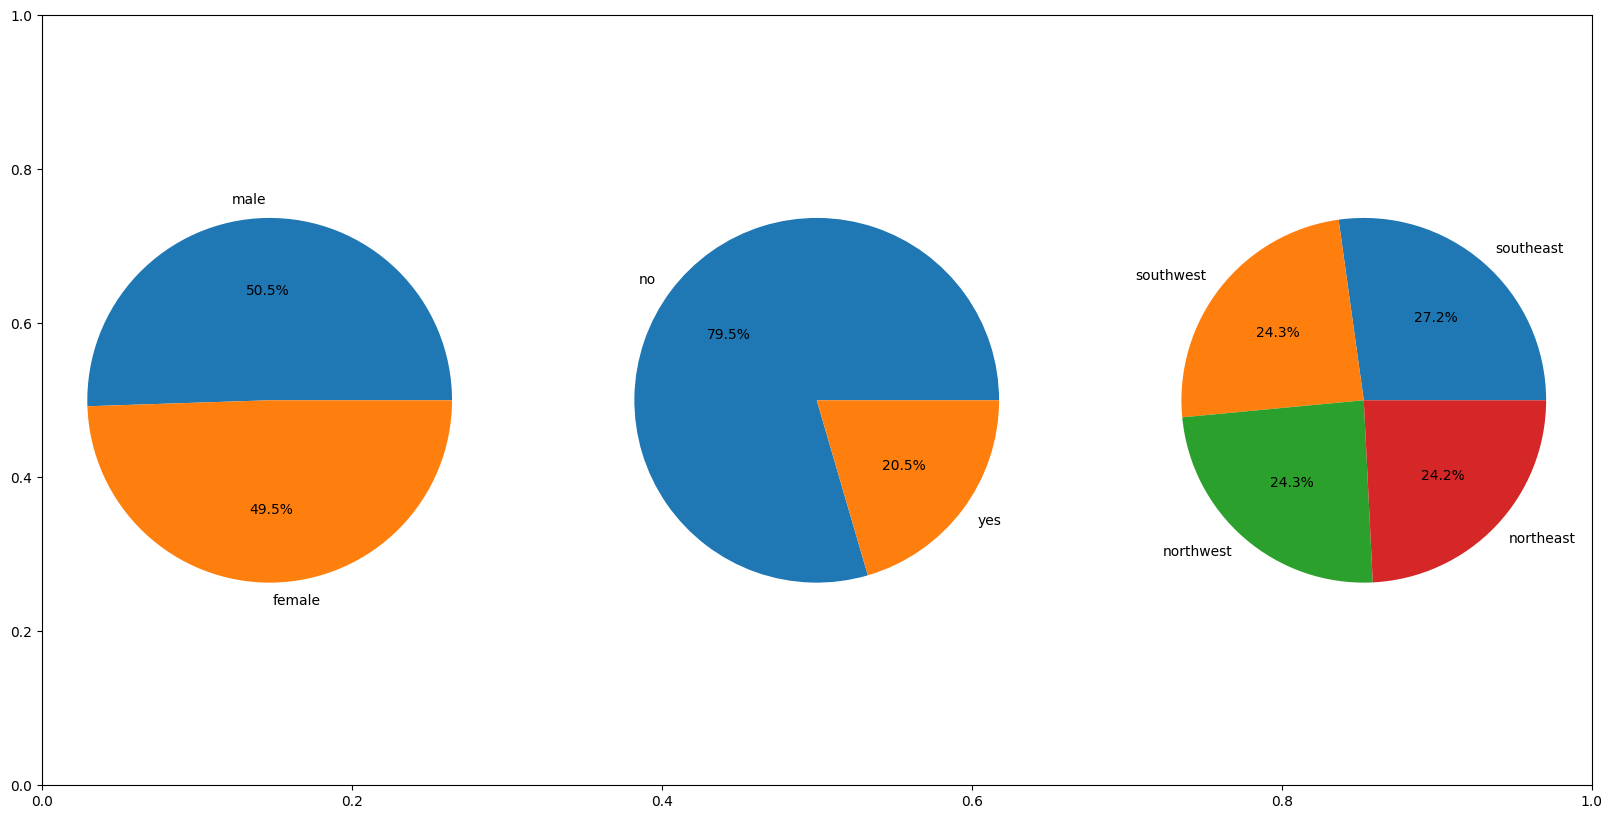

In [ ]:
#The data provided to us is equally distributed among the sex and the 
# region columns but in the smoker column, we can observe a ratio of 80:20.
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

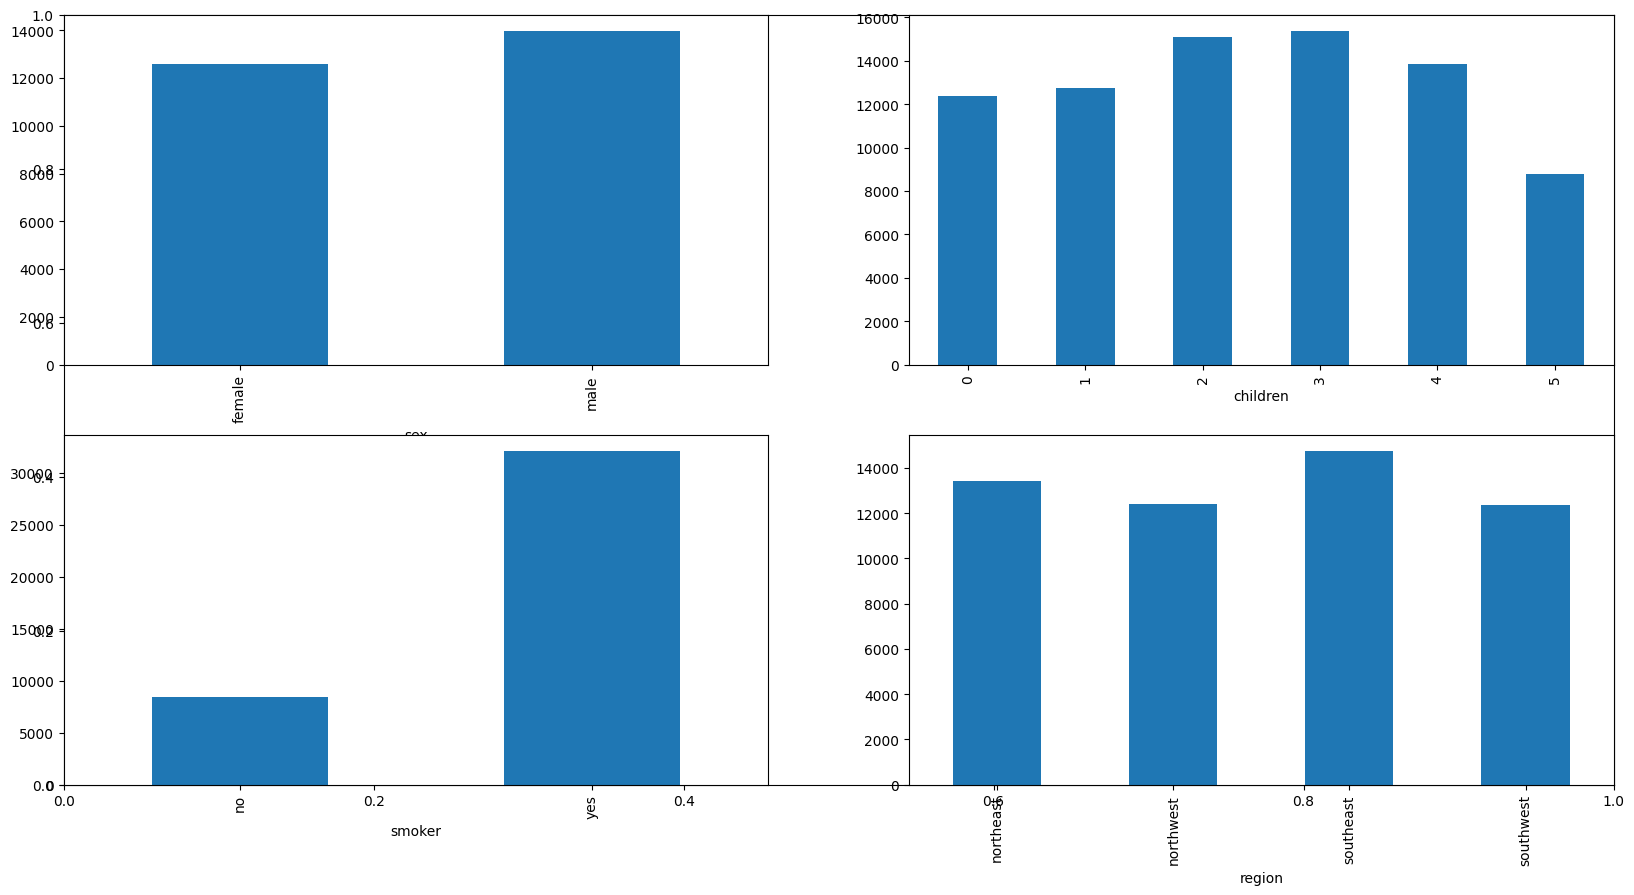

In [ ]:
#Charges are on the higher side for males as compared to females 
# but the difference is not that much.
#Premium charged from the smoker is around thrice that which 
# is charged from non-smokers.
#Charges are approximately the same in the given four regions
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

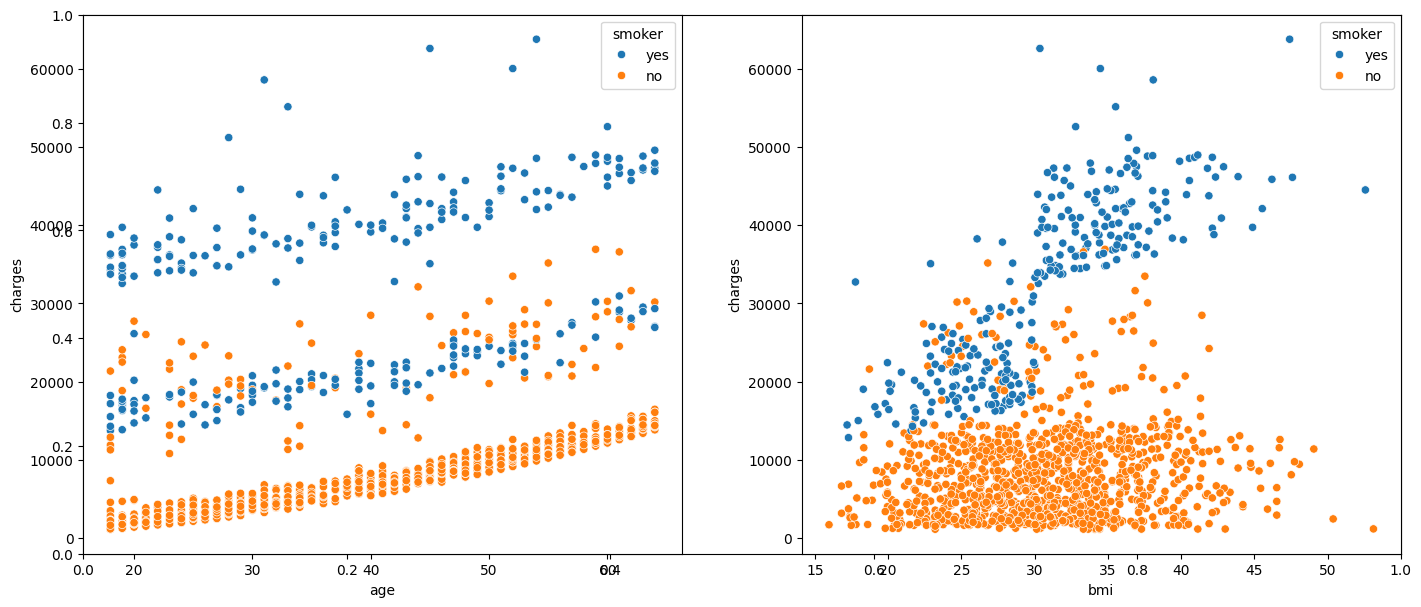

In [ ]:
#A clear distinction can be observed here between the charges 
# that smokers have to pay. Also here as well we can observe 
# that as the age of a person increases premium prices goes up as well.
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()

<Axes: ylabel='age'>

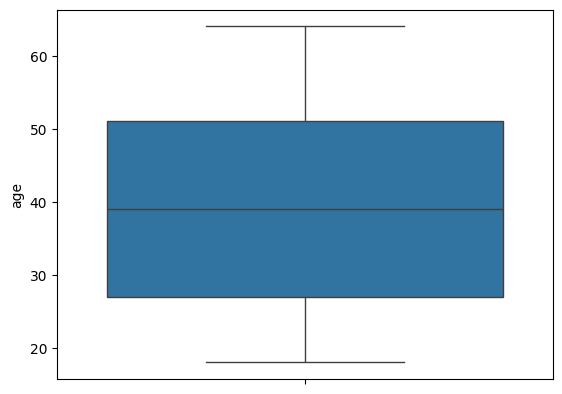

In [ ]:
#Data Preprocessing
df.drop_duplicates(inplace=True)
#we can see that there are no outliers present in age column
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

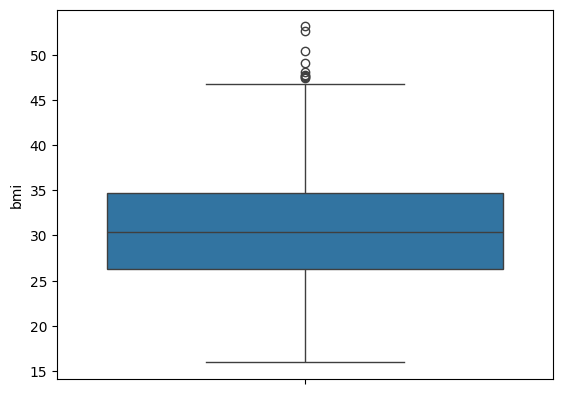

In [ ]:
#checks that outleirs exist for the BMI Column
sns.boxplot(df['bmi'])

In [ ]:
#Due to the presence of outliers present in bmi column we need to 
# treat the outliers by replacing the 
#values with mean as the bmi column consists of continuous data.
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

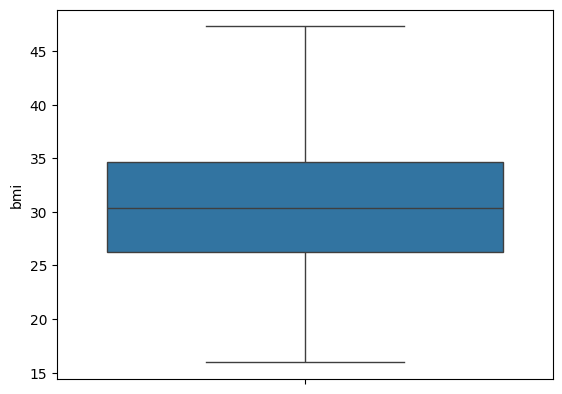

In [ ]:
#Now we successfully treated the outliers 
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [ ]:
#Data Wrangling - Data wrangling is a technique to ensure whether the data 
# follow normal or standard distribution and encode the discrete data 
# for prediction.
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

In [ ]:
#Encoding - Encoding is done for discrete categorical data
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [ ]:
#Depicts the correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [ ]:
# After dividing the data into training and validation data it is 
# considered a better practice to achieve stable and fast training 
# of the model.We have identified the best random_state number for 
# this data set as 42 .Now we fix this random_state and try with different 
# ml algorithms for better score or accuracy.
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 df1

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression - Train R2:",lrmodel.score(xtrain,ytrain))
print("Linear Regression - Test R2:",lrmodel.score(xtest,ytest))
print("Linear Regression - CV Score:",cross_val_score(lrmodel,X,Y,cv=5,).mean())
print("-"*60)

Linear Regression - Train R2: 0.7295415541376447
Linear Regression - Test R2: 0.8062391115570589
Linear Regression - CV Score: 0.7470697972809902
------------------------------------------------------------


In [90]:

svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("SVR - Train R2:",r2_score(ytrain,ypredtrain1))
print("SVR - Test R2:",r2_score(ytest,ypredtest1))
print("SVR - CV Score:",cross_val_score(svrmodel,X,Y,cv=5,).mean())
print("-"*60)

SVR - Train R2: -0.10151474302536445
SVR - Test R2: -0.1344454720199666
SVR - CV Score: -0.10374591327267262
------------------------------------------------------------


In [91]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest - Train R2:",r2_score(ytrain,ypredtrain2))
print("Random Forest - Train R2:",r2_score(ytest,ypredtest2))
print("Random Forest - CV Score:",cross_val_score(rfmodel,X,Y,cv=5,).mean())
print("-"*60)
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
print("-"*60)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest - Train R2:",r2_score(ytrain,ypredtrain2))
print("Random Forest - Train R2:",r2_score(ytest,ypredtest2))
print("Random Forest - CV Score:",cross_val_score(rfmodel,X,Y,cv=5,).mean())
print("-"*60)

Random Forest - Train R2: 0.9738163260247533
Random Forest - Train R2: 0.8819423353068565
Random Forest - CV Score: 0.8363637309718952
------------------------------------------------------------
{'n_estimators': 120}
------------------------------------------------------------
Random Forest - Train R2: 0.9746383984429655
Random Forest - Train R2: 0.8822009842175969
Random Forest - CV Score: 0.8367438097052858
------------------------------------------------------------


In [92]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient Boosting - Train R2:",r2_score(ytrain,ypredtrain3))
print("Gradient Boosting - Train R2:",r2_score(ytest,ypredtest3))
print("Gradient Boosting - CV Score:",cross_val_score(gbmodel,X,Y,cv=5,).mean())
print("-"*60)
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
print("-"*60)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient Boosting - Train R2:",r2_score(ytrain,ypredtrain3))
print("Gradient Boosting - Train R2:",r2_score(ytest,ypredtest3))
print("Gradient Boosting - CV Score:",cross_val_score(gbmodel,X,Y,cv=5,).mean())
print("-"*60)


Gradient Boosting - Train R2: 0.8931345821166041
Gradient Boosting - Train R2: 0.9042558673604
Gradient Boosting - CV Score: 0.8551679680507174
------------------------------------------------------------
{'learning_rate': 0.2, 'n_estimators': 19}
------------------------------------------------------------
Gradient Boosting - Train R2: 0.8682397447116927
Gradient Boosting - Train R2: 0.9017109716082662
Gradient Boosting - CV Score: 0.8606041910125791
------------------------------------------------------------


In [93]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGBoost - Train R2:",r2_score(ytrain,ypredtrain4))
print("XGBoost - Train R2:",r2_score(ytest,ypredtest4))
print("XGBoost - CV Score:",cross_val_score(xgmodel,X,Y,cv=5,).mean())
print("-"*60)
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
print("-"*60)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGBoost - Train R2:",r2_score(ytrain,ypredtrain4))
print("XGBoost - Train R2:",r2_score(ytest,ypredtest4))
print("XGBoost - CV Score:",cross_val_score(xgmodel,X,Y,cv=5,).mean())
print("-"*60)

XGBoost - Train R2: 0.9954123497009277
XGBoost - Train R2: 0.8548938035964966
XGBoost - CV Score: 0.8081253051757813
------------------------------------------------------------
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
------------------------------------------------------------
XGBoost - Train R2: 0.869317352771759
XGBoost - Train R2: 0.9022461175918579
XGBoost - CV Score: 0.8607115387916565
------------------------------------------------------------


In [ ]:
#From the above table we can observe 
# that XGBoost is the best model.Now we 
# need to identify the important features for predicting of charges.
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [ ]:
#Importance of Features
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [ ]:
#Final Model
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("XGBoost - Final Train R2:",r2_score(ytrain,ypredtrain4))
print("XGBoost - Final Train R2:",r2_score(ytest,ypredtest4))
print("XGBoost - Final CV Score:",cross_val_score(finalmodel,X,Y,cv=5,).mean())

XGBoost - Final Train R2: 0.8691051602363586
XGBoost - Final Train R2: 0.9007425308227539
XGBoost - Final CV Score: 0.8606266975402832


In [ ]:
#Save the model
dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [ ]:
#Predicts the new data
new_data=pd.DataFrame({'age':10,'sex':'male','bmi':29,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([19353.428], dtype=float32)